# Milestone 4 EDA & KPI

## Load the feature dataset

In [3]:
import pandas as pd

In [4]:
#df = pd.read_csv('outputs/globex_retail_features.csv',parse_dates=['order_Date'])
#df = pd.read_csv("outputs/globex_retail_features.csv", parse_dates=["Order_Date"])
df = pd.read_csv("outputs/globex_retail_features.csv", parse_dates=["Order_Date"])

df.head()

,Customer_ID,Order_ID,Order_Date,Product_Category,Product_Sub_Category,Quantity,Price,Discount,Customer_Location,Revenue,Revenue_calc,order_year,order_month,order_month_name,order_day_of_week,gross_sales,discount_amount,net_sales,customer_segment
0,CUST_013738,ORD_00102406,2023-01-01,Home & Garden,Gardening Tools,1,419.19,0.00,TN,419.1900,419.1900,2023,1,January,Sunday,419.19,0.0000,419.1900,Standard
1,CUST_011726,ORD_00102902,2023-01-01,Electronics,Laptops,1,222.37,0.09,TN,202.3567,202.3567,2023,1,January,Sunday,222.37,20.0133,202.3567,Standard
2,CUST_010891,ORD_00103864,2023-01-01,Electronics,Laptops,6,1107.65,0.00,IN,6645.9000,6645.9000,2023,1,January,Sunday,6645.90,0.0000,6645.9000,High_Value
3,CUST_011452,ORD_00103560,2023-01-01,Electronics,Gaming Consoles,5,288.84,0.00,MA,1444.2000,1444.2000,2023,1,January,Sunday,1444.20,0.0000,1444.2000,Standard
4,CUST_010886,ORD_00100632,2023-01-02,Electronics,Headphones,1,191.27,0.00,AZ,191.2700,191.2700,2023,1,January,Monday,191.27,0.0000,191.2700,High_Value


In [5]:
df["customer_segment"] = df["customer_segment"].replace(
    {"High Value": "High_Value"}
)

df["customer_segment"].value_counts()


customer_segment
Standard      3676
High_Value    1324
Name: count, dtype: int64

## KPI A - Revenue by Category

In [6]:
revenue_by_category = (

    df.groupby('Product_Category')['net_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
revenue_by_category

,Product_Category,net_sales
0,Electronics,2.079574e+06
1,Home & Garden,6.814707e+05
2,Sports,4.744529e+05
3,Clothing,2.819485e+05
4,Beauty,1.371077e+05
5,Books,6.522193e+04


KPI B - Top Sub-Categories by Revenue

In [7]:
top_subcategories = (
    df.groupby("Product_Sub_Category")["net_sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)
top_subcategories


,Product_Sub_Category,net_sales
0,Smart Watches,403335.4208
1,Smartphones,365802.8764
2,Tablets,348740.8234
3,Gaming Consoles,332296.2353
4,Headphones,318398.7129
5,Laptops,310999.7473
6,Gardening Tools,129829.3451
7,Kitchen Appliances,125048.8293
8,Storage,110330.1389
9,Home Decor,109826.6465


## KPI C - Average Order Value by Customer Segment

In [8]:
aov_by_segment = (
    df.groupby("customer_segment")["net_sales"]
      .mean()
      .reset_index(name="avg_order_value")
)
aov_by_segment


,customer_segment,avg_order_value
0,High_Value,1860.514119
1,Standard,341.799478


## KPI D - Monthly Revenue Trend

In [9]:
monthly_revenue = (
    df.groupby(
        df["Order_Date"].dt.to_period("M")
    )["net_sales"]
    .sum()
    .reset_index()
)

monthly_revenue["Order_Date"] = monthly_revenue["Order_Date"].astype(str)
monthly_revenue


,Order_Date,net_sales
0,2023-01,177437.6013
1,2023-02,173608.8882
2,2023-03,151549.1629
3,2023-04,160107.8262
4,2023-05,167926.8782
5,2023-06,134903.8958
6,2023-07,202245.1529
7,2023-08,102365.7004
8,2023-09,153440.8570
9,2023-10,160409.8015


### Drafting Chart

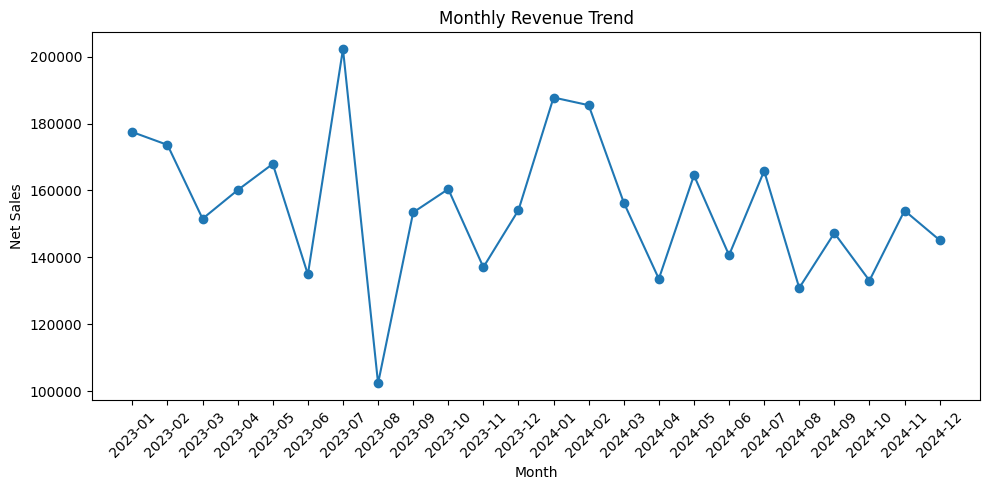

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["Order_Date"], monthly_revenue["net_sales"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Net Sales")
plt.tight_layout()
plt.show()
